In [ ]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from io import StringIO
from IPython.display import Image
import graphviz
import pydotplus
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [ ]:
data = pd.read_csv('./banana_quality.csv')
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41.0,40367.0,No
1,2,Dallas,Male,54.0,45084.0,No
2,3,Dallas,Male,42.0,52483.0,No
3,4,Dallas,Male,40.0,40941.0,No
4,5,Dallas,Male,46.0,50289.0,No


In [ ]:
from sklearn.preprocessing import LabelEncoder
X = data.drop('Quality', axis=1)
y = data['Quality']#ключевое значени
label_encoder = LabelEncoder()
y = data['Quality'] = label_encoder.fit_transform(data['Quality'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'data' is not defined

# Стекинг


In [ ]:
!pip install heamy
from heamy.estimator import Regressor, Classifier
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset
# Качество отдельных моделей
def val_mae(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = mean_absolute_error(y_test, y_pred)
    print(model)
    print('MAE={}'.format(result))
def val_metrics(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
# Visualize the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       781
           1       0.88      0.89      0.88       819

    accuracy                           0.88      1600
   macro avg       0.88      0.88      0.88      1600
weighted avg       0.88      0.88      0.88      1600



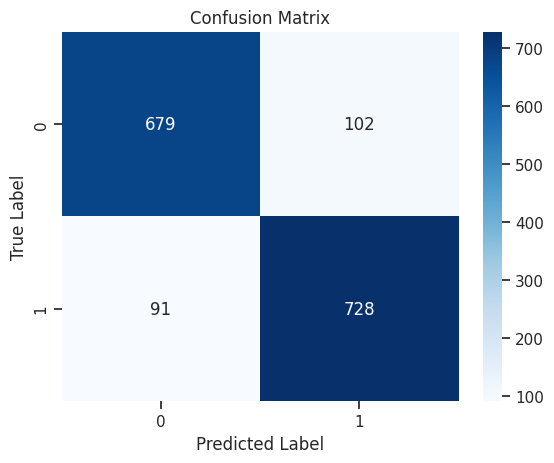


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       781
           1       0.94      0.94      0.94       819

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600



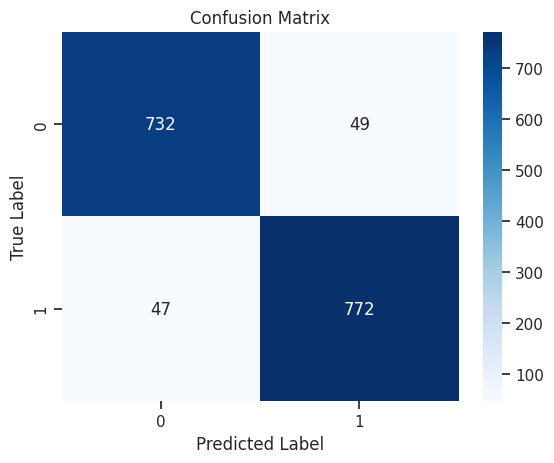


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       781
           1       0.96      0.95      0.96       819

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



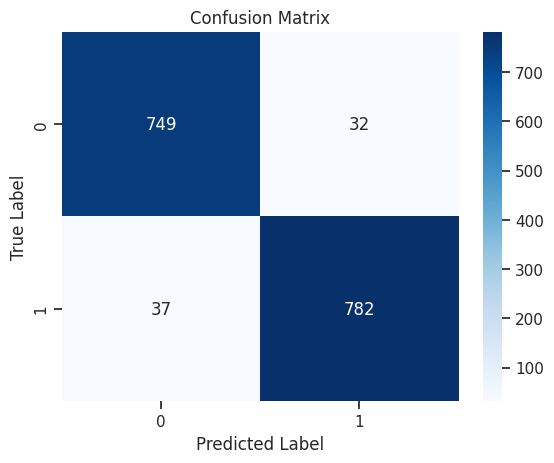

In [ ]:
# Точность на отдельных моделях
for model in [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=5,  random_state=10)
]:
    val_metrics(model)
    print('==========================')
    print()


In [ ]:
# Используем библиотеку heamy
# набор данных
dataset = Dataset(X_train, y_train, X_test)

# модели первого уровня
model_tree =Classifier(dataset=dataset, estimator=DecisionTreeClassifier, name='tree')
model_lr =Classifier(dataset=dataset, estimator=LogisticRegression,name='lr')
model_rf = Classifier(dataset=dataset, estimator=RandomForestClassifier, parameters={'n_estimators': 50},name='rf')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Эксперимент 1
# Первый уровень - две модели: дерево и линейная регрессия
# Второй уровень: линейная регрессия

pipeline = ModelsPipeline(model_tree, model_lr)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Classifier(dataset=stack_ds, estimator=LogisticRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.10451838188200427, 0.10125290164825893, 0.10078423835142196, 0.10338597721925832, 0.11605247849300362, 0.11288661895927703, 0.10911287336520677, 0.11482929282053671, 0.10325836051698004, 0.11622491816423916]
Mean accuracy: 0.10823060414201865
Standard Deviation: 0.005976631548449277
Variance: 3.57201246659192e-05


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Эксперимент 2
# Первый уровень - две модели: дерево и линейная регрессия
# Второй уровень: случайный лес

stacker = Classifier(dataset=stack_ds, estimator=RandomForestClassifier)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.100884375, 0.104421875, 0.092796875, 0.09678125, 0.11352552083333331, 0.102546875, 0.10795312500000001, 0.12073437499999999, 0.10378255208333334, 0.099515625]
Mean accuracy: 0.10429424479166664
Standard Deviation: 0.007715634679437427
Variance: 5.9531018506537485e-05


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Эксперимент 3
# Первый уровень - три модели: дерево, линейная регрессия и случайный лес
# Второй уровень: линейная регрессия
pipeline = ModelsPipeline(model_tree, model_lr, model_rf)
stack_ds3 = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Classifier(dataset=stack_ds3, estimator=LogisticRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Metric: mean_absolute_error
Folds accuracy: [0.05540742435312649, 0.04905296041123065, 0.04950336731783696, 0.040179878546035566, 0.051103751479427716, 0.05776707283477407, 0.05206181802645001, 0.05449117053051925, 0.052780153972344104, 0.04916085601537421]
Mean accuracy: 0.05115084534871191
Standard Deviation: 0.004560426670135877
Variance: 2.07974914136866e-05


In [ ]:
# Эксперимент 4
# Первый уровень - три модели: дерево, линейная регрессия и случайный лес
# Второй уровень: случайный лес
# Результат хуже чем в эксперименте 3
stacker = Classifier(dataset=stack_ds3, estimator=RandomForestClassifier)
results = stacker.validate(k=10,scorer=mean_absolute_error)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Metric: mean_absolute_error
Folds accuracy: [0.051265625, 0.043234375000000005, 0.04203125, 0.040593750000000005, 0.048984375000000004, 0.051640624999999996, 0.04718750000000001, 0.050453125, 0.05121875, 0.041093750000000005]
Mean accuracy: 0.046770312499999994
Standard Deviation: 0.004332325635285999
Variance: 1.8769045410156236e-05


In [ ]:
# Результаты
array_labels = ['LR','TREE', 'RF', 'TREE+LR=>LR',
                'TREE+LR=>RF', 'TREE+LR+RF=>LR', 'TREE+LR+RF=>RF']
array_mae = [0.120625, 0.061875, 0.043125,
             0.11028701948348234,0.10757926339285714,0.0516612679869042,
              0.047690625]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


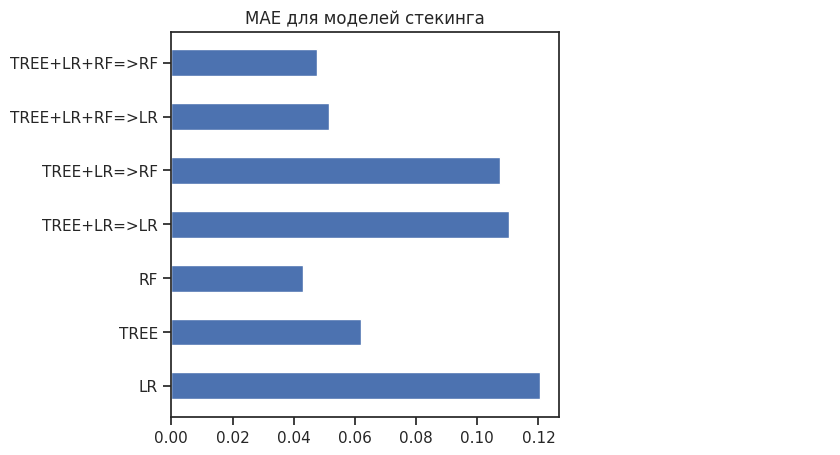

In [ ]:
def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5,
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0.2, a-0.1, str(round(b,3)), color='white')
    plt.show()
# Визуализация результатов
vis_models_quality(array_mae, array_labels, 'MAE для моделей стекинга')

# Многослойный перцептрон

In [ ]:
from scipy.stats import mode
import numpy as np
#from mnist import MNIST
from time import time
import pandas as pd
import os
import matplotlib.pyplot as matplot
import matplotlib
%matplotlib inline

import random
matplot.rcdefaults()
from time import time
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.model_selection import ParameterGrid
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tslab = ['Size',	'Weight',	'Sweetness',	'Softness',	'HarvestTime',	'Ripeness',	'Acidity']
mlp = MLPClassifier()
mlp.fit(X, y)

MLPClassifier()

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       781
           1       0.99      0.99      0.99       819

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



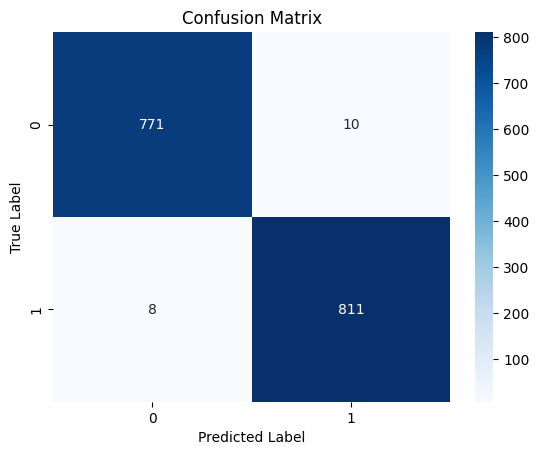

In [ ]:
# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the classifier
print('Classification Report:')
print(classification_report(y_test, y_pred))
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

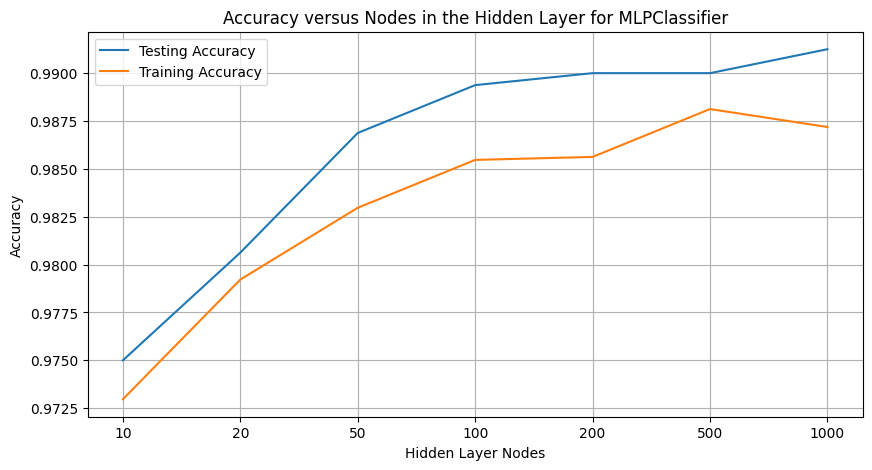

In [ ]:
acc = []
acc_tr = []
timelog = []
for l in [10,20,50,100,200,500,1000]:
    t = time()
    mlp = MLPClassifier(alpha=0.1, max_iter=200, hidden_layer_sizes=(l,))
    mlp.fit(X, y)
    endt = time() - t

    a_tr = accuracy_score(y_train, mlp.predict(X_train)) # Train Accuracy
    a = accuracy_score(y_test, mlp.predict(X_test)) # Test Accuracy

    acc_tr.append(a_tr)
    acc.append(a)
    timelog.append(endt)
    l = [10,20,50,100,200,500,1000]
N = len(l)
l2 = np.arange(N)
matplot.subplots(figsize=(10, 5))
matplot.plot(l2, acc, label="Testing Accuracy")
matplot.plot(l2, acc_tr, label="Training Accuracy")
matplot.xticks(l2,l)
matplot.grid(True)
matplot.xlabel("Hidden Layer Nodes")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus Nodes in the Hidden Layer for MLPClassifier', fontsize=12)
matplot.show()

# Метод группового учета аргументов:

Решение задачи регрессии

In [ ]:
!pip install gmdh

In [ ]:
def print_metrics(y_test, y_pred, squared=False):
    print(f"R^2: {r2_score(y_test, y_pred)}")
    crit_name = "MSE" if squared else "RMSE"
    print(f"{crit_name}: {mean_squared_error(y_test, y_pred, squared=squared)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

In [ ]:
from gmdh import Combi, split_data
import gmdh
x_train, x_test, y_train, y_test = split_data(X, y)
model = Combi()
model.fit(x_train, y_train, verbose=1, n_jobs=-1, test_size=0.24, limit=0,
                       criterion=gmdh.Criterion(gmdh.CriterionType.REGULARITY))
y_pred = model.predict(x_test)
# compare predicted and real value
print()
print(model.get_best_polynomial())
print_metrics(y_test, y_pred)

LEVEL 1  [=========================] 100% :00s] (7 combinations) error=211.518886
LEVEL 2  [=========================] 100% :00s] (21 combinations) error=193.455913
LEVEL 3  [=========================] 100% :00s] (35 combinations) error=213.685225

y = 0.0286*x1 + 0.0459*x5 + 0.6615
R^2: -61.63244313432547
RMSE: 0.5582082089984609
MAE: 0.5490899715422711


In [ ]:
ria_model = gmdh.Ria()
ria_model.fit(x_train, y_train, verbose=1, n_jobs=-1, test_size=0.52, limit=0, k_best=7,
                     criterion=gmdh.Criterion(gmdh.CriterionType.REGULARITY),
                     polynomial_type=gmdh.PolynomialType.LINEAR)
y_pred_ria = ria_model.predict(x_test)
print_metrics(y_test,y_pred_ria)

LEVEL 1  [=========================] 100% :00s] (21 combinations) error=796.741116
LEVEL 2  [=========================] 100% :00s] (49 combinations) error=796.741116
LEVEL 3  [=========================] 100% :00s] (49 combinations) error=796.741116
LEVEL 4  [=========================] 100% :00s] (49 combinations) error=796.741116
R^2: -83.8890399251385
RMSE: 0.6498638116002184
MAE: 0.6495062505779384
